### Adam Mischke
### 18 Feb 2018
### CSCI 4850-5850 - Neural Networks
### Homework 3 - Data Visualization with s Principal Component Analysis (PCA)
### Due: Feb. 20 @ 11:00pm

#### Imports:

In [76]:
# file in
import os

# for reading data sets from the web
import pandas as pd

# for all the numpy greatness
import numpy as np

# to make plots n stuff
import matplotlib.pyplot as plt
%matplotlib inline

# LaTex and sympy are awesome!
from sympy import *
init_printing(use_latex=True)
from IPython.display import display

# PCA library from sklearn
from sklearn.decomposition import PCA

# keras
import keras

In [115]:
# mean center of a vector
def mean_center(x):
    return x - np.mean(x)

# pca helper class
class PCAhelper:
    
    # initialize: using a filename
    def __init__(self, filename):
        
        # read in the data into a np matrix
        self.data = np.array(pd.read_table(filename,
                             delim_whitespace=True,
                             header=None))
        
        # set the number of columns from the shape
        self.columns = self.data.shape[1] - 1
        
        # set the feature matrix
        self.X = self.data[:,0:self.columns]
        
        # set the class vector
        self.Y = self.data[:,self.columns]
        
    
    # displays the feature and class shapes
    def show_shape(self):
        display(self.X.shape)
        display(self.Y.shape)
        
    # apply the mean centered function across the features matrix
    def set_xcenter(self):
        self.center = np.apply_along_axis(mean_center, 0, self.X)
        
    # calculates and assigns the SVD
    def SVD(self):
        # singular value decompostion (left-singular)
        # U = left singular vectors, (unit length)
        # S = singular-values
        self.U,self.S,self.V = np.linalg.svd(self.center, full_matrices=True)
    
    # plots the SVD in matplotlib
    def plot_SVD(self):
        # percentage variance accounted for
        plt.plot( (100.0 * self.S) / np.sum(self.S) )
        plt.ylabel('% variance')
        plt.xlabel('singular value')
        plt.show()
        
    # display the variance of the first two principal components
    def print_variance(self, x=2):
        # variance accounted for in the first two principal components
        display(100.0 * ( (self.S[0] + self.S[1]) / np.sum(self.S) ))
        
        # variance
        display(100.0 * ( (np.sum(self.S[0:x]))/ np.sum(self.S)))
        # reduction
        display(100 * x/ len(self.S))
    
    # sets the Principle components 
    def set_PC(self):
        # create and fill a 2-d matrix with zeros
        self.D = np.zeros([self.X.shape[0], self.X.shape[1]])

        # fill in the values from S into D as a diagonal
        np.fill_diagonal(self.D,self.S)

        # matrix multiply the new D with our unit left singular vectors
        x_rotated = np.dot(self.U,self.D)

        # collect the two principal components
        self.PCs = x_rotated[:,0:2]
    
    # displays the shape of the PC matrix
    def PC_shape(self):
        display(self.PCs.shape)
     
    # plots the principal components
    def plot_PC(self, colors):
        # scatter plot our data!
        plt.scatter(self.PCs[:,0], self.PCs[:,1],
                   color = [colors[i] for i in self.Y.astype(int)])

        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.show()

#### Wisconson Data Breast Cancer set:

In [116]:
# grab the WDBC data set
WDBC_local = os.path.join('data', 'WDBC.txt')

# instantiate a PCA helper for the breast cancer data
WDBC = PCAhelper(filename = WDBC_local)

# display the shape
WDBC.show_shape()

# display how many unique classifications/class labels we have
display(Matrix(np.unique(WDBC.Y)).T)

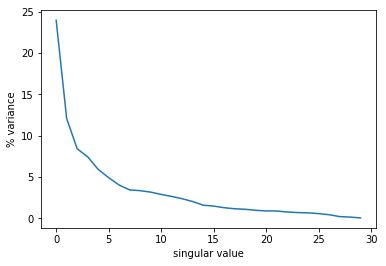

In [117]:
WDBC.set_xcenter()   # sets the x center
WDBC.SVD()           # sets the SVD
WDBC.plot_SVD()      # plots the SVD

#### WDBC, Wisconsin Data Breast Cancer set
#### Singular Value <b>[0,30]</b> by % Variance <b>[0,25]</b> graph:
This plot shows a sharp decline, which means the first 5 or so singular combinations have a good amount of variance.

In [113]:
WDBC.print_variance()    # prints the % variance

In [99]:
WDBC.set_PC()      # sets the PCs
WDBC.PC_shape()    # shows the shape of the PCs

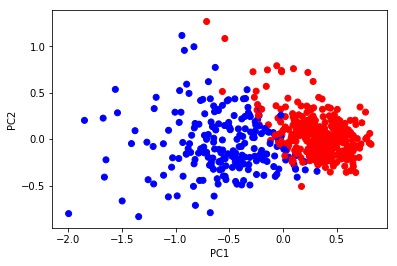

In [100]:
colors = ['red', 'blue']       # two classes
WDBC.plot_PC(colors = colors)  # plot the pca with the colors above

#### WDBC, Wisconsin Data Breast Cancer set
#### Principle Component Plot:
This graph clearly shows the differences between:<br>
[0] = <font color=blue>blue</font><br>
[1] = <span style="color:red">red</span><br>
<br>
There is a discrete line that could seperate the two classes, with some exceptions of the blue and red mixing some in the middle.
A single layer network could probably handle this problem.

#### Cancer data set:

In [101]:
# grab the can er data set
cancer_local = os.path.join('data', 'cancer-data.txt')

# instantiate a PCA helper for the breast cancer data
cancer = PCAhelper(filename = cancer_local)

# display the shape
cancer.show_shape()

# display how many unique classifications/class labels we have
display(Matrix(np.unique(cancer.Y)).T)

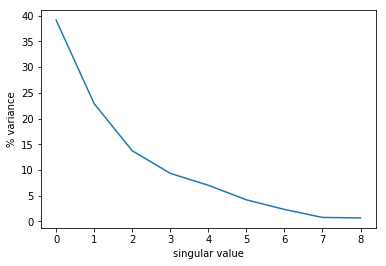

In [102]:
cancer.set_xcenter()   # sets the x center
cancer.SVD()           # sets the SVD
cancer.plot_SVD()      # plots the SVD

#### Cancer Set
#### Singular Value <b>[0,8]</b> by % Variance <b>[0,40]</b> graph:
This plot shows a smoother function, but that's probably because we used less dimensions of features. Still, the first singular value gives us around 40% of the variance and the second around 25%ish.

It also has more variance in the first 2 entries of the set rather than the WDBC set.

In [114]:
cancer.print_variance()    # prints the % variance

In [108]:
cancer.set_PC()      # sets the PCs
cancer.PC_shape()    # shows the shape of the PCs

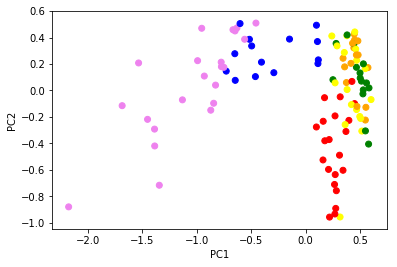

In [109]:
# 6 classes
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'violet']
cancer.plot_PC(colors = colors)      # plots the cancer PC data

#### Cancer Set 
#### Principle Component Plot:
This graph clearly shows the differences between:<br>
[0] = <span style="color:red">red</span><br>
[1] = <font color=orange>orange</font><br>
[2] = <font color=yellow>yellow</font><br>
[3] = <font color=green>green</font><br>
[4] = <font color=blue>blue</font><br>
[5] = <font color=indigo>indigo</font><br>
<br>
There are clear distinctions between most classes, except for maybe the orange, green, and yellow.

The pink, blue, and red and pretty distinct.

A multilayer network would be required for this type of problem as there are not clear defined linear separations between the classes.